# AI Project
In this project we have tried to create a baseline analysis to understand some characteristics about the different wines based on the regions and different wineries.

![Wine quality](https://images.unsplash.com/photo-1506377247377-2a5b3b417ebb?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjExNzczfQ)


## We tried to answer a bunch of questions, like:

- Do Provinces have the same number of wines? <br>
- Whats the distribuition of Price and Points by Province? <br>
- Whats the country distribuition<br>
- The taster's have the same number of votings? <br>
- What's the distribuition of Points and Prices by taster's name?   <br>
- Taking a look on the word clouds.    <br>


## Importing Libraries

In [ ]:
import pandas as pd #Library to handle with dataframes
import matplotlib.pyplot as plt # Library to plot graphics
import numpy as np # To handle with matrices
import seaborn as sns # to build modern graphics
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from scipy import stats

## Functions def

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)

    return summary

def CalcOutliers(df_num):
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values

    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]

    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points

    return



In [ ]:
# Importing our dataset in variable df_wine1
df_wine1 = pd.read_csv('/content/winemag-data-130k-v2.csv', index_col=0)

In [ ]:
df_wine1

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer 

<h2>Let's take a first look on our data</h2>

- A histogram, univariate as well as crossing features <br>

In [ ]:
resumetable(df_wine1)

Dataset Shape: (129971, 13)


Name   dtypes  Missing  Uniques  \
0                 country   object       63       43   
1             description   object        0   119955   
2             designation   object    37465    37979   
3                  points    int64        0       21   
4                   price  float64     8996      390   
5                province   object       63      425   
6                region_1   object    21247     1229   
7                region_2   object    79460       17   
8             taster_name   object    26244       19   
9   taster_twitter_handle   object    31213       15   
10                  title   object        0   118840   
11                variety   object        1      707   
12                 winery   object        0    16757   

                                          First Value  \
0                                               Italy   
1   Aromas include tropical fruit, broom, brimston...   
2                                        Vulkà Bianco   
3                                                  87   
4                                                 NaN   
5                                   Sicily & Sardinia   
6                                                Etna   
7                                                 NaN   
8                                       Kerin O’Keefe   
9                                        @kerinokeefe   
10                  Nicosia 2013 Vulkà Bianco  (Etna)   
11                                        White Blend   
12                                            Nicosia   

                                         Second Value  \
0                                            Portugal   
1   This is ripe and fruity, a wine that is smooth...   
2                                            Avidagos   
3                                                  87   
4                                                15.0   
5                                               Douro   
6                                                 NaN   
7                                                 NaN   
8                                          Roger Voss   
9                                          @vossroger   
10      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
11                                     Portuguese Red   
12                                Quinta dos Avidagos   

                                          Third Value  Entropy  
0                                                  US     2.77  
1   Tart and snappy, the flavors of lime flesh and...    16.83  
2                                                 NaN    13.83  
3                                                  87     3.64  
4                                                14.0     5.77  
5                                              Oregon     5.05  
6                                   Willamette Valley     7.89  
7                                   Willamette Valley     3.28  
8                                        Paul Gregutt     3.39  
9                                         @paulgwine      3.23  
10      Rainstorm 2013 Pinot Gris (Willamette Valley)    16.81  
11                                         Pinot Gris     5.67  
12                                          Rainstorm    12.98

<h2>Let's start looking the distribuition of Points and Prices </h2>

In [ ]:
# The function describe is focused on numerical features
# in this case are points and price
print("Statistics of numerical data: ")
print(df_wine1.describe())

Statistics of numerical data: 
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


Very interesting distribuition of Points and Price.
- We can see that the values of points are distributed between 80 and 100
- The price have a high difference between the values and a high standard deviation
- In prices, the IQR (Interquantil Range) is 25. The max value is 3300;

We will explore it further later, lets start.

# Points Distribution
- I will start exploring points and after I will see the same on price
- Let's see the points distributions and quantiles

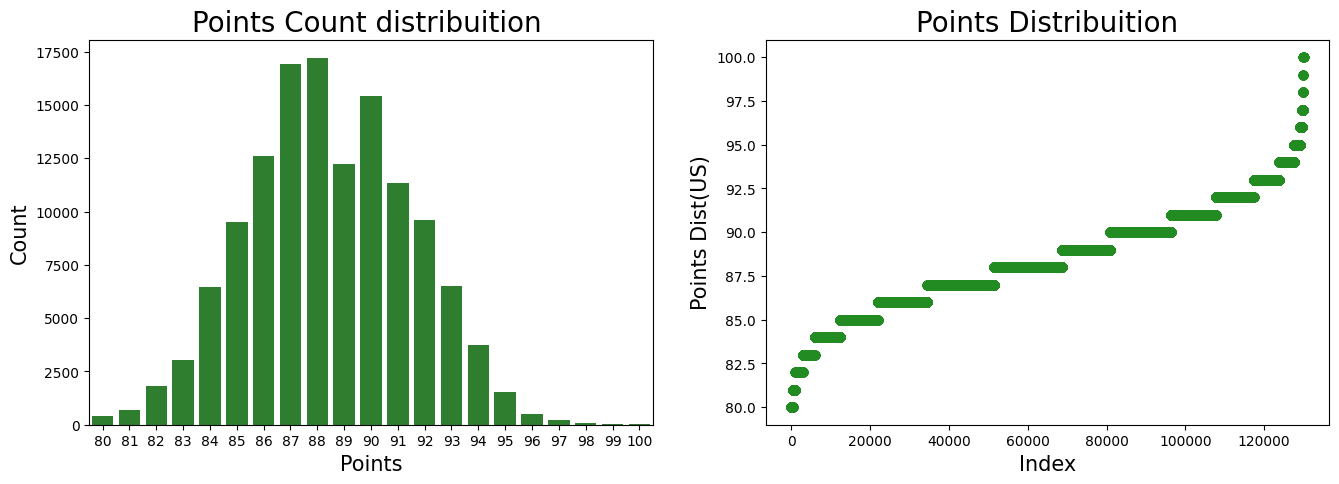

In [ ]:
# define the size of figures that I will build
plt.figure(figsize=(16,5))

plt.subplot(1,2,1) # this will create a grid of 1 row and 2 columns; this is the first graphic
g = sns.countplot(x='points', data=df_wine1, color='forestgreen') # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

plt.subplot(1,2,2)  # this will set the second graphic of our grid
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.points.values), color='forestgreen') # creating a cumulative distribution
plt.xlabel('Index', fontsize=15)  # seting xlabel and size of font
plt.ylabel('Points Dist(US)', fontsize=15)  # seting ylabel and size of font
plt.title("Points Distribuition", fontsize=20) # seting title and size of font

plt.show() #rendering the graphs

The data distribution is quite evident, closely resembling a normal distribution.

Interestingly, there are only a small number of wines with scores below 82 or above 95 points.


## Let's set the points into categories.

In [ ]:
def cat_points(points):
    if points in list(range(80,83)):
        return 0
    elif points in list(range(83,87)):
        return 1
    elif points in list(range(87,90)):
        return 2
    elif points in list(range(90,94)):
        return 3
    elif points in list(range(94,98)):
        return 4
    else:
        return 5

df_wine1["rating_cat"] = df_wine1["points"].apply(cat_points)

## Ploting Rating categories
- Let's see the distribution after the transformation

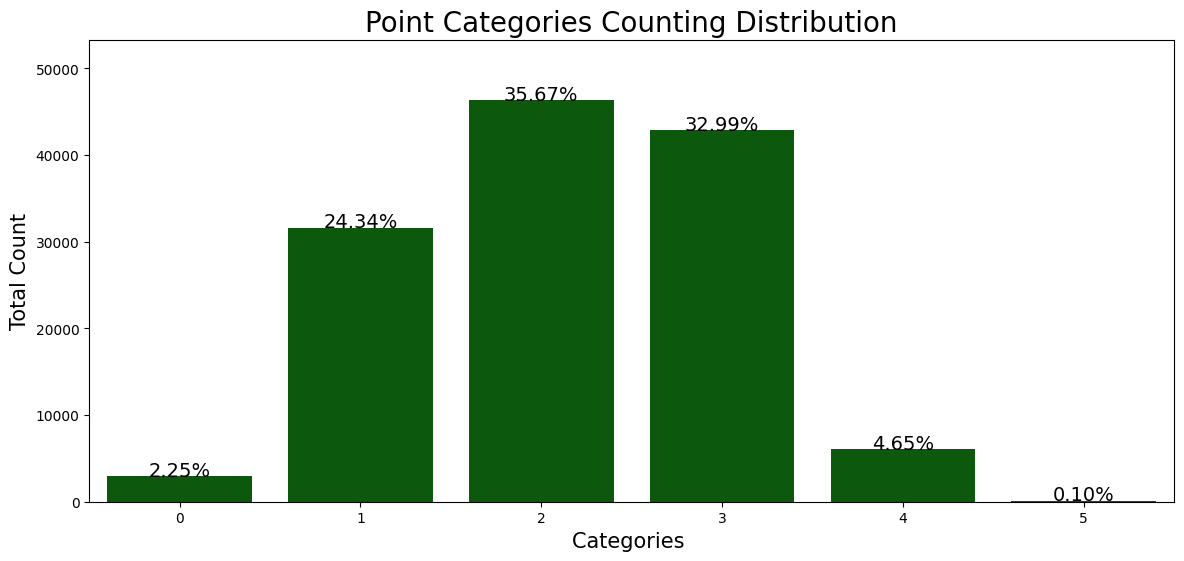

In [ ]:
total = len(df_wine1)
plt.figure(figsize=(14,6))

g = sns.countplot(x='rating_cat', color='darkgreen',
                  data=df_wine1)
g.set_title("Point Categories Counting Distribution", fontsize=20)
g.set_xlabel("Categories ", fontsize=15)
g.set_ylabel("Total Count", fontsize=15)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center", fontsize=14)

g.set_ylim(0, max(sizes) * 1.15)

plt.show()

Nice! Now we can have a clearly understand of our data in a more clean way. It could be interesting to compare each other regions;

to

## Detecting Outlier Points

In [ ]:
CalcOutliers(df_wine1['points'])

Identified lowest outliers: 0
Identified upper outliers: 129
Identified outliers: 129
Non-outlier observations: 129842
Total percentual of Outliers:  0.0994


These insights are indeed intriguing!

It's noteworthy that all the outliers in this feature appear to be concentrated in the upper values, indicating that there's a skew towards higher point ratings.

Furthermore, it's quite remarkable that only a tiny fraction, less than 0.01%, of wines fall into the outlier category for points. Specifically, there are just 129 wines with scores exceeding 98 points.

# Price Distribution

<ipython-input-52-288fce7cdeaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(np.log(df_wine1['price'].dropna() + 1),


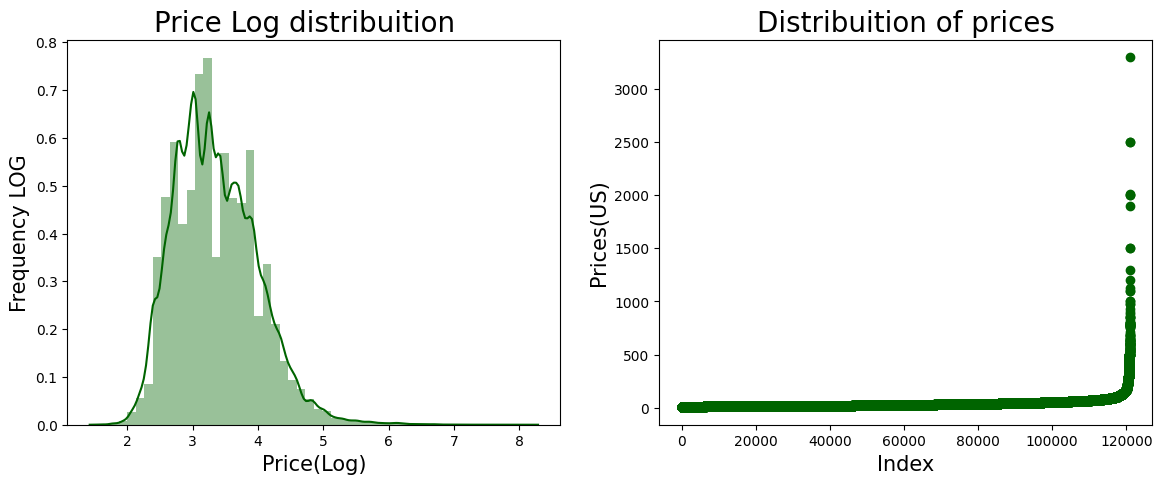

In [ ]:
plt.figure(figsize=(14,5))

g1 = plt.subplot(121)
g1 = sns.distplot(np.log(df_wine1['price'].dropna() + 1),
                  color='darkgreen')
g1.set_title("Price Log distribuition  ", fontsize=20)
g1.set_xlabel("Price(Log)", fontsize=15)
g1.set_ylabel("Frequency LOG", fontsize=15)

plt.subplot(122)
plt.scatter(range(df_wine1.shape[0]), np.sort(df_wine1.price.values),
            color='darkgreen')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Prices(US)', fontsize=15)
plt.title("Distribuition of prices", fontsize=20)


plt.show()

Nice!!! The Price Log give us an impression that the data could normaly distributed, but like in points, we need to test.

## Outliers in Prices

In [ ]:
CalcOutliers(df_wine1['price'])

Identified lowest outliers: 0
Identified upper outliers: 1177
Identified outliers: 1177
Non-outlier observations: 119798
Total percentual of Outliers:  0.9825


Now we can clearly see that we have less than 1% of outliers, that is 1177 prices that is out of our range

# Let's see a filtered distribution of Prices

<ipython-input-54-bee91b09add7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_wine1[df_wine1['price'] < 300]['price'], color='darkgreen')


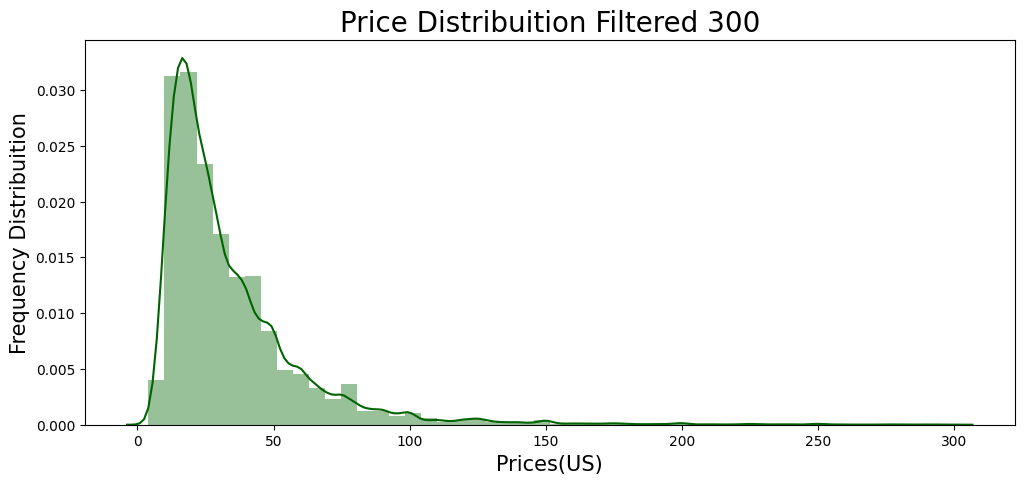

In [ ]:
plt.figure(figsize=(12,5))

g = sns.distplot(df_wine1[df_wine1['price'] < 300]['price'], color='darkgreen')
g.set_title("Price Distribuition Filtered 300", fontsize=20)
g.set_xlabel("Prices(US)", fontsize=15)
g.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

Nice. It confirms what we saw in the above exploration. The greastest part of all analyzed wines have values under $ 100;

In [ ]:
# Let's get tehe price_log to better work with this feature
df_wine1['price_log'] = np.log(df_wine1['price'])

## Crossing prices and Points

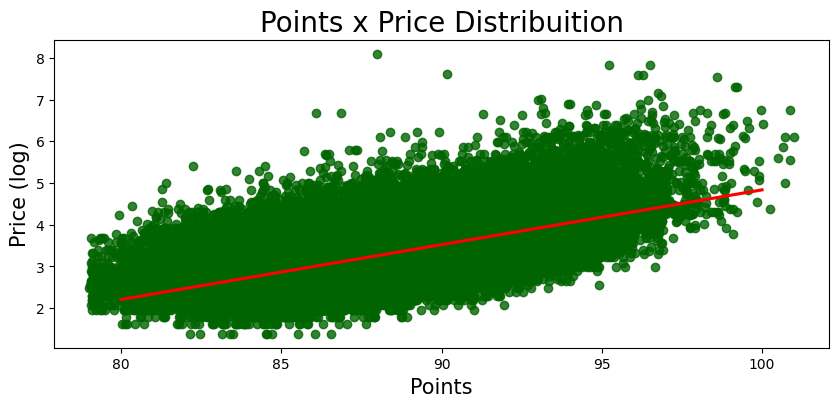

In [ ]:
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log',
                data=df_wine1, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)

plt.show()

The scatter plot provides meaningful information:

1. Notably, the wine with the highest price is not the one with the highest point rating.
2. It's interesting to observe that the most expensive wines typically have point scores within the range of 87 to 90.

# Country Feature

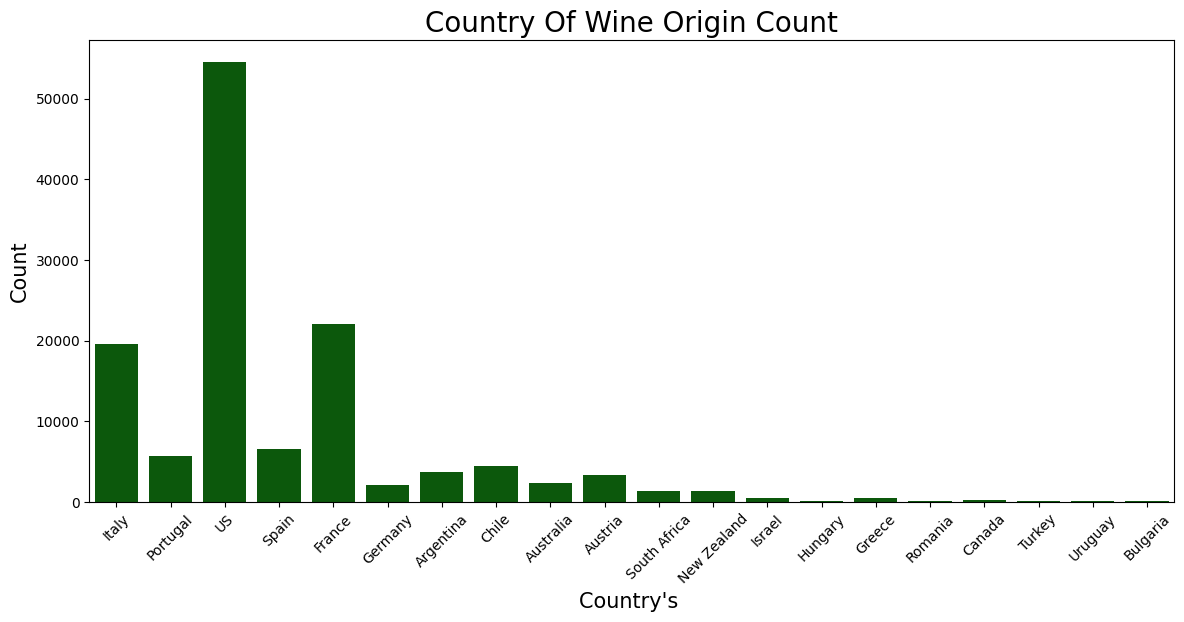

In [ ]:
plt.figure(figsize=(14,6))

country = df_wine1.country.value_counts()[:20]

g = sns.countplot(x='country',
                  data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g.set_title("Country Of Wine Origin Count", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

## Now, I will take a look in the distribuition of this top 20 countrys by price and rating

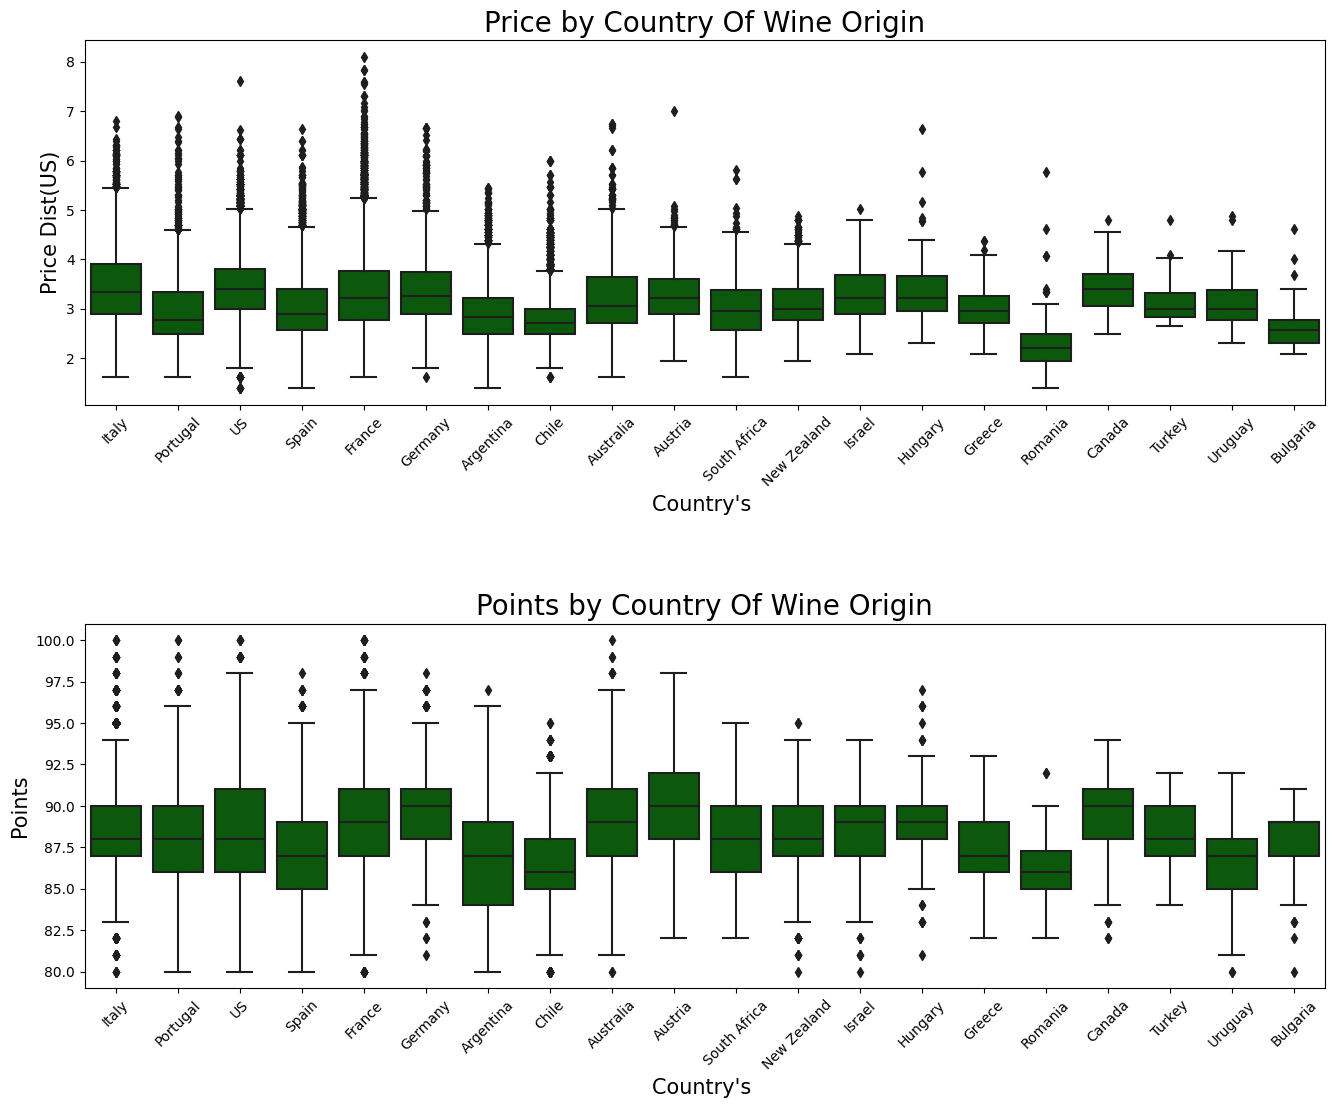

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
g = sns.boxplot(x='country', y='price_log',
                  data=df_wine1.loc[(df_wine1.country.isin(country.index.values))],
                 color='darkgreen')
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(2,1,2)
g1 = sns.boxplot(x='country', y='points',
                   data=df_wine1[df_wine1.country.isin(country.index.values)],
                 color='darkgreen')
g1.set_title("Points by Country Of Wine Origin", fontsize=20)
g1.set_xlabel("Country's ", fontsize=15)
g1.set_ylabel("Points", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## Taking a look on values lowest than 500

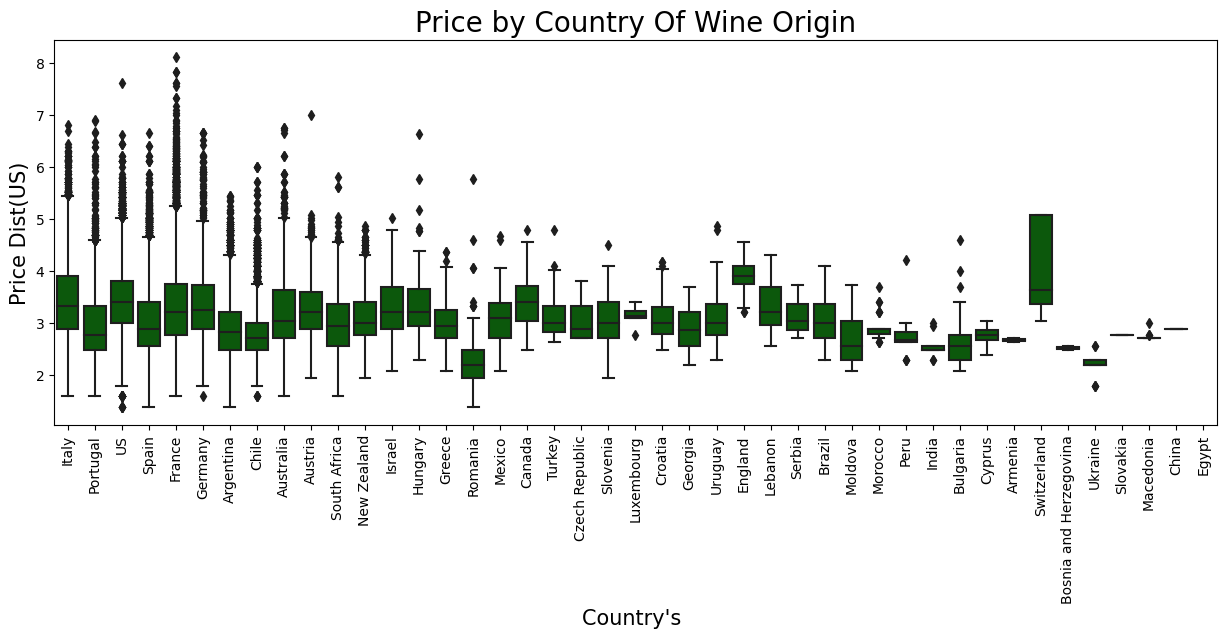

In [ ]:
plt.figure(figsize=(15,5))
g = sns.boxplot(x='country', y='price_log', color='darkgreen',
                  data=df_wine1)
g.set_title("Price by Country Of Wine Origin", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Price Dist(US)", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

It's very interesting that all wines have  quartiles in a values lower than 100

## Province Exploration

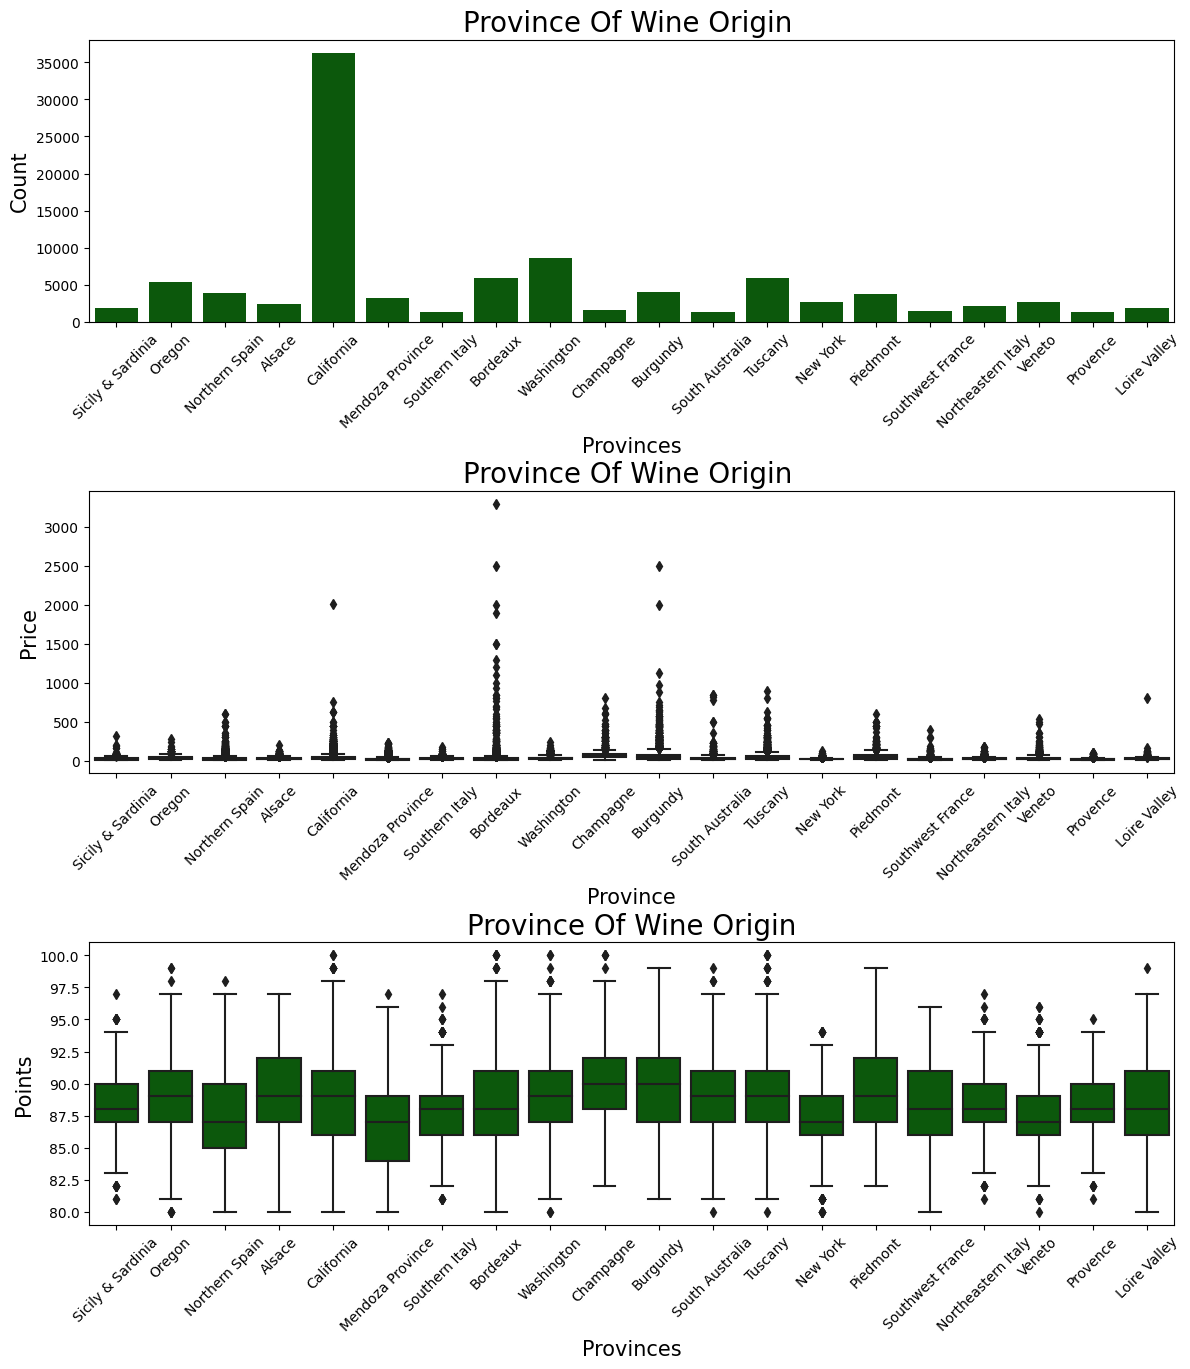

In [ ]:
plt.figure(figsize=(14,15))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Provinces", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
                  color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='province',
                  data=df_wine1.loc[(df_wine1.province.isin(provinces.index.values))],
                  color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

# Taster Feature

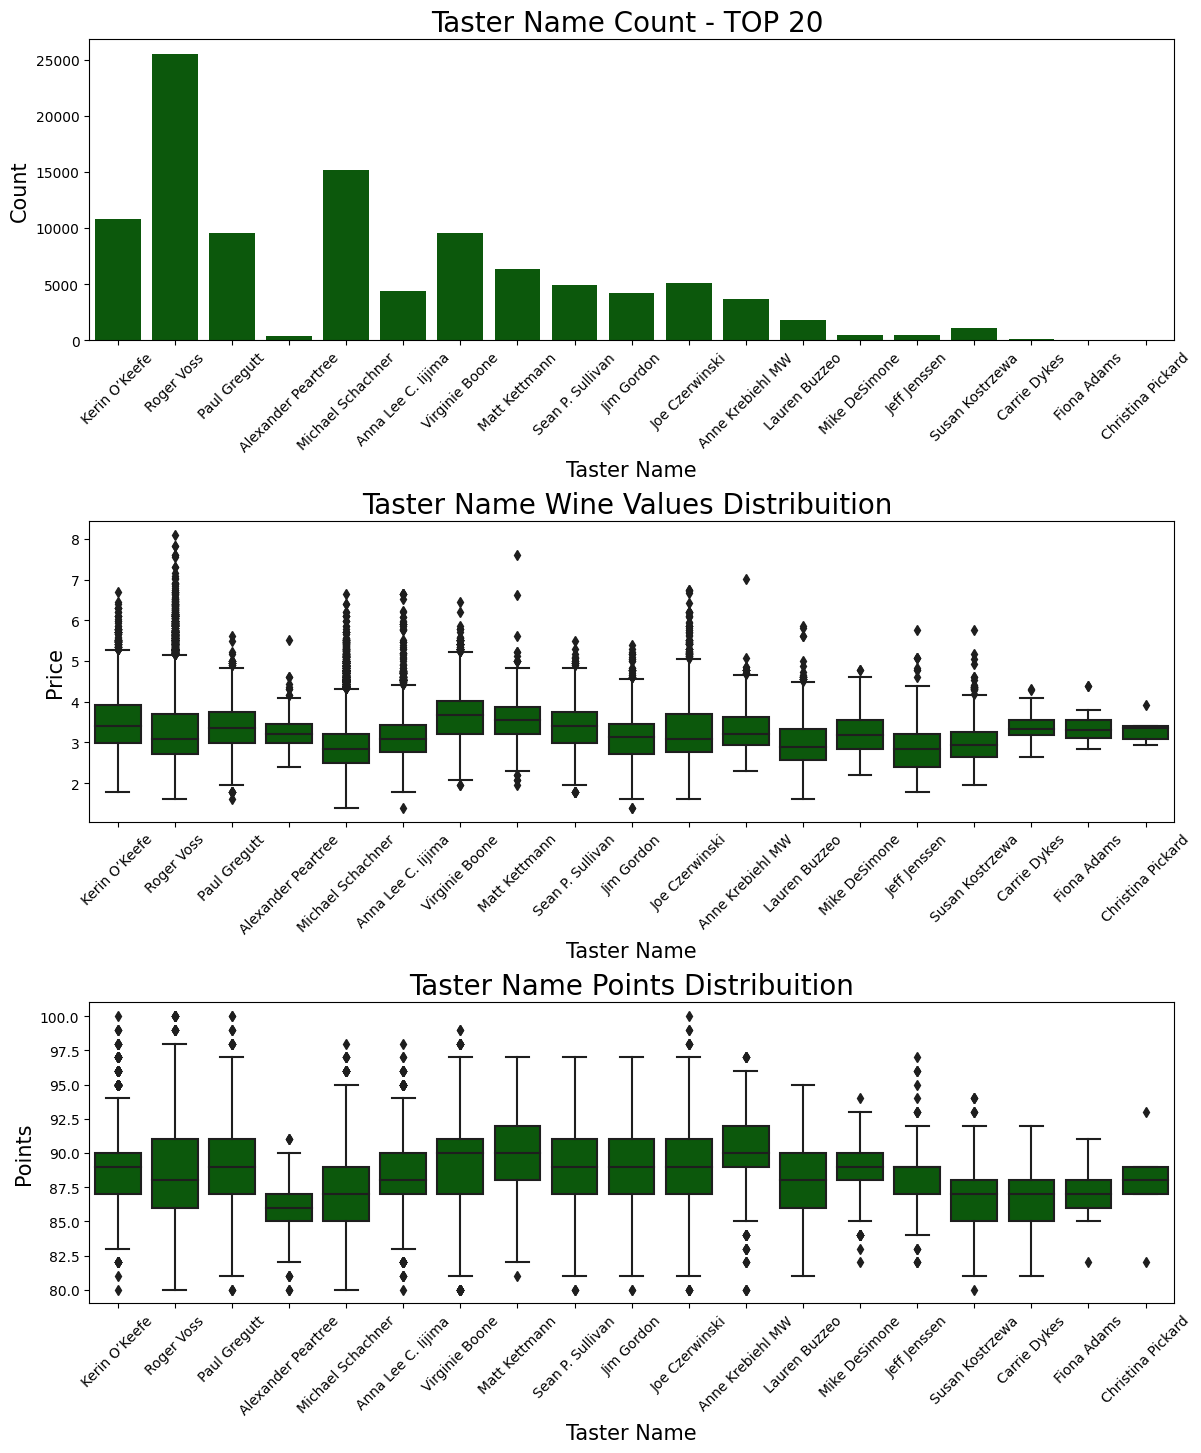

In [ ]:
plt.figure(figsize=(14,16))

provinces = df_wine1['province'].value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='taster_name', data=df_wine1, color='darkgreen')
g.set_title("Taster Name Count - TOP 20 ", fontsize=20)
g.set_xlabel("Taster Name", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='taster_name', data=df_wine1,
                 color='darkgreen')
g1.set_title("Taster Name Wine Values Distribuition ", fontsize=20)
g1.set_xlabel("Taster Name", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='taster_name',
                  data=df_wine1, color='darkgreen')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## PROVINVCE FEATURE

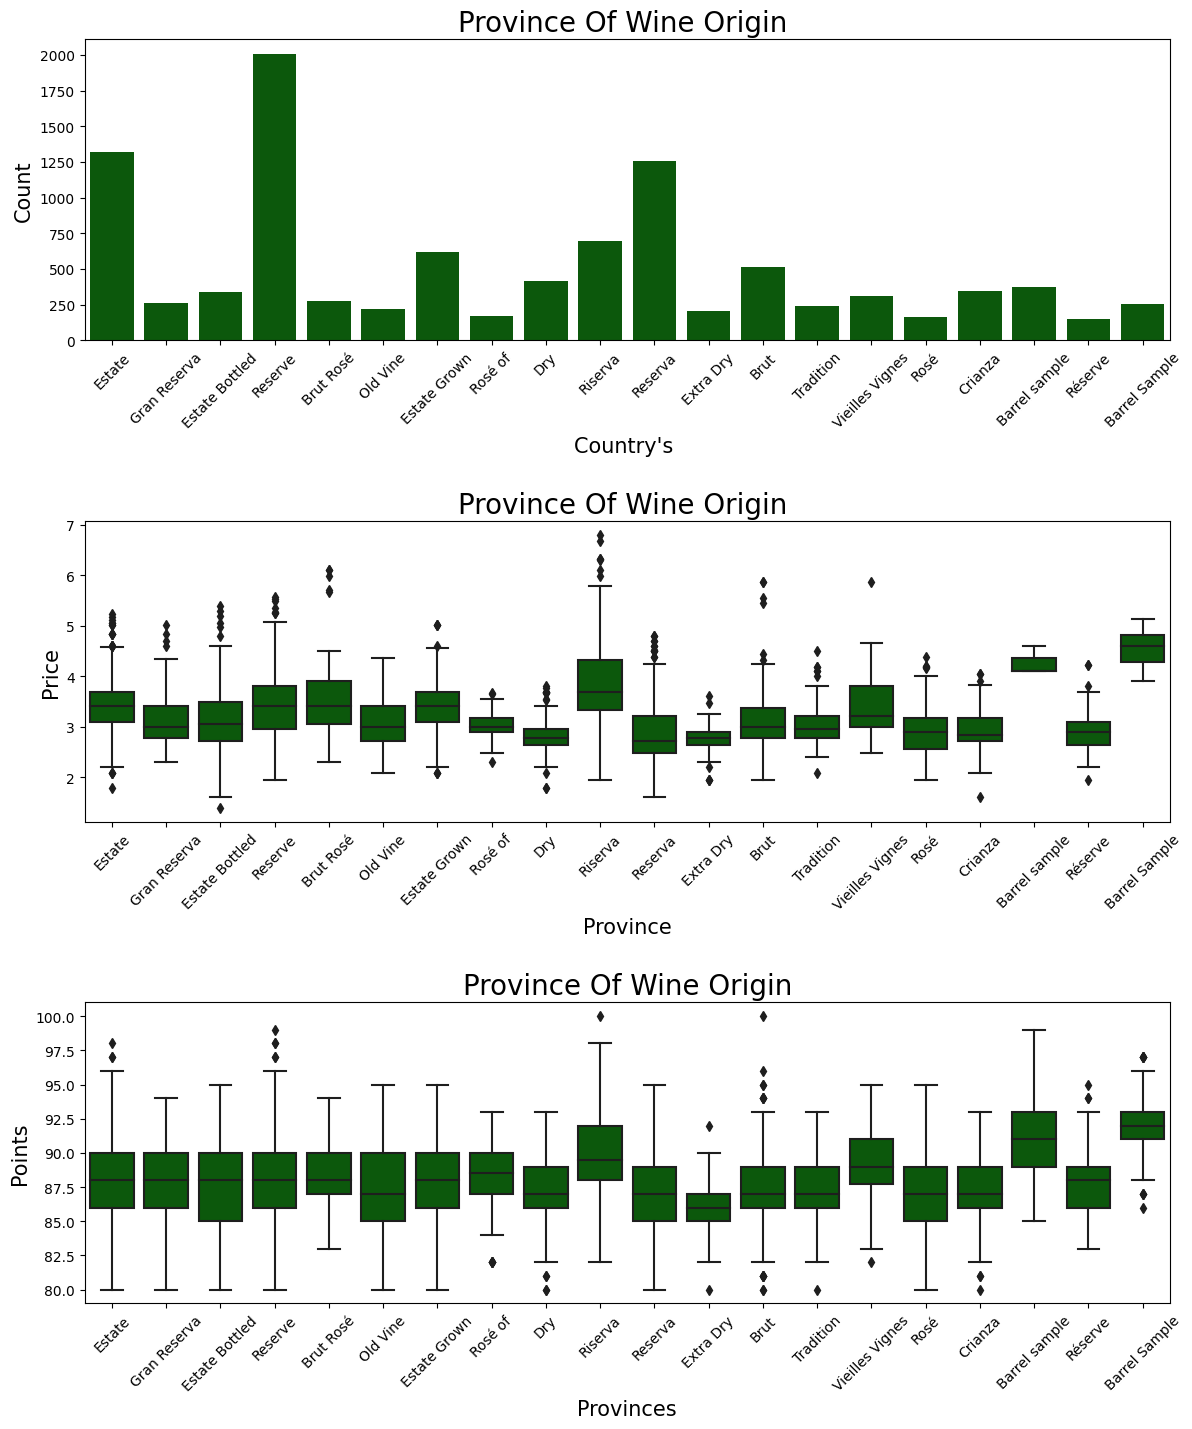

In [ ]:
plt.figure(figsize=(14,16))

designation = df_wine1.designation.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                  color='darkgreen')
g.set_title("Province Of Wine Origin ", fontsize=20)
g.set_xlabel("Country's ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                 color='darkgreen')
g1.set_title("Province Of Wine Origin ", fontsize=20)
g1.set_xlabel("Province", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='designation',
                  data=df_wine1.loc[(df_wine1.designation.isin(designation.index.values))],
                 color='darkgreen')
g2.set_title("Province Of Wine Origin", fontsize=20)
g2.set_xlabel("Provinces", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()

## VARIETY FEATURE

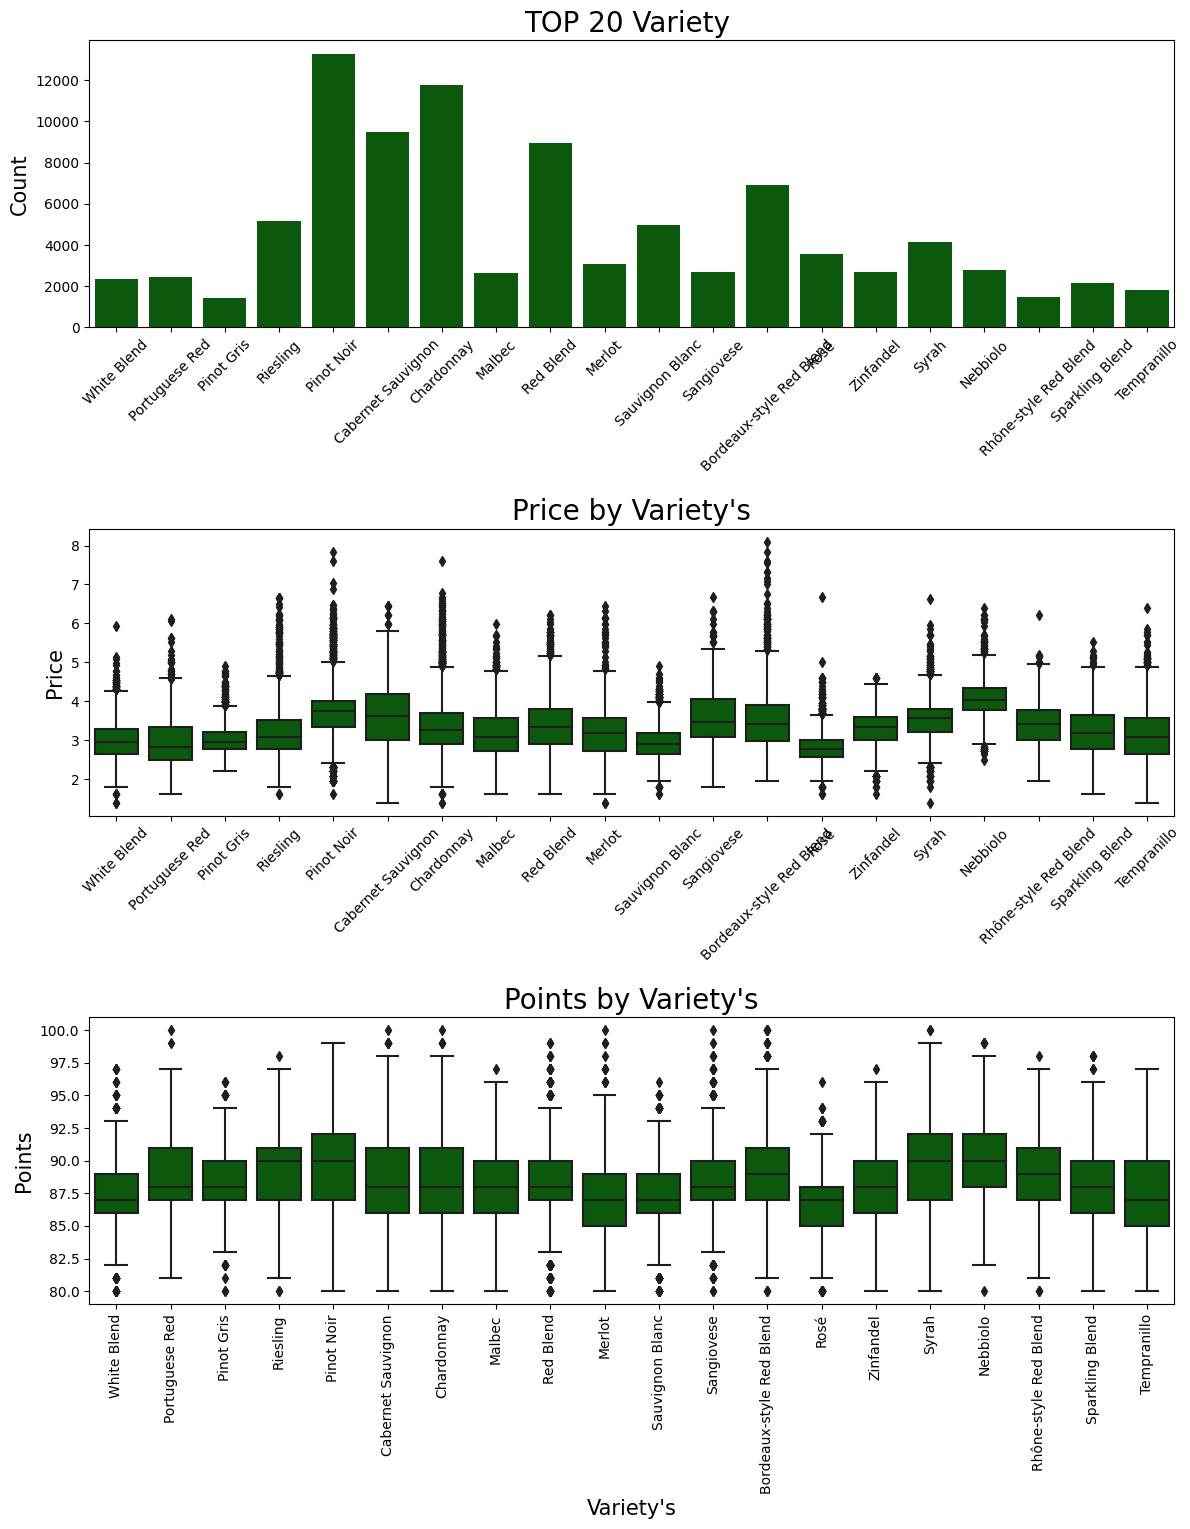

In [ ]:
plt.figure(figsize=(14,16))

variety = df_wine1.variety.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))],
                  color='darkgreen')
g.set_title("TOP 20 Variety ", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))],
                 color='darkgreen')
g1.set_title("Price by Variety's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='variety',
                  data=df_wine1.loc[(df_wine1.variety.isin(variety.index.values))],
                 color='darkgreen')
g2.set_title("Points by Variety's", fontsize=20)
g2.set_xlabel("Variety's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

## Let's take a look at Winery Distribuitions

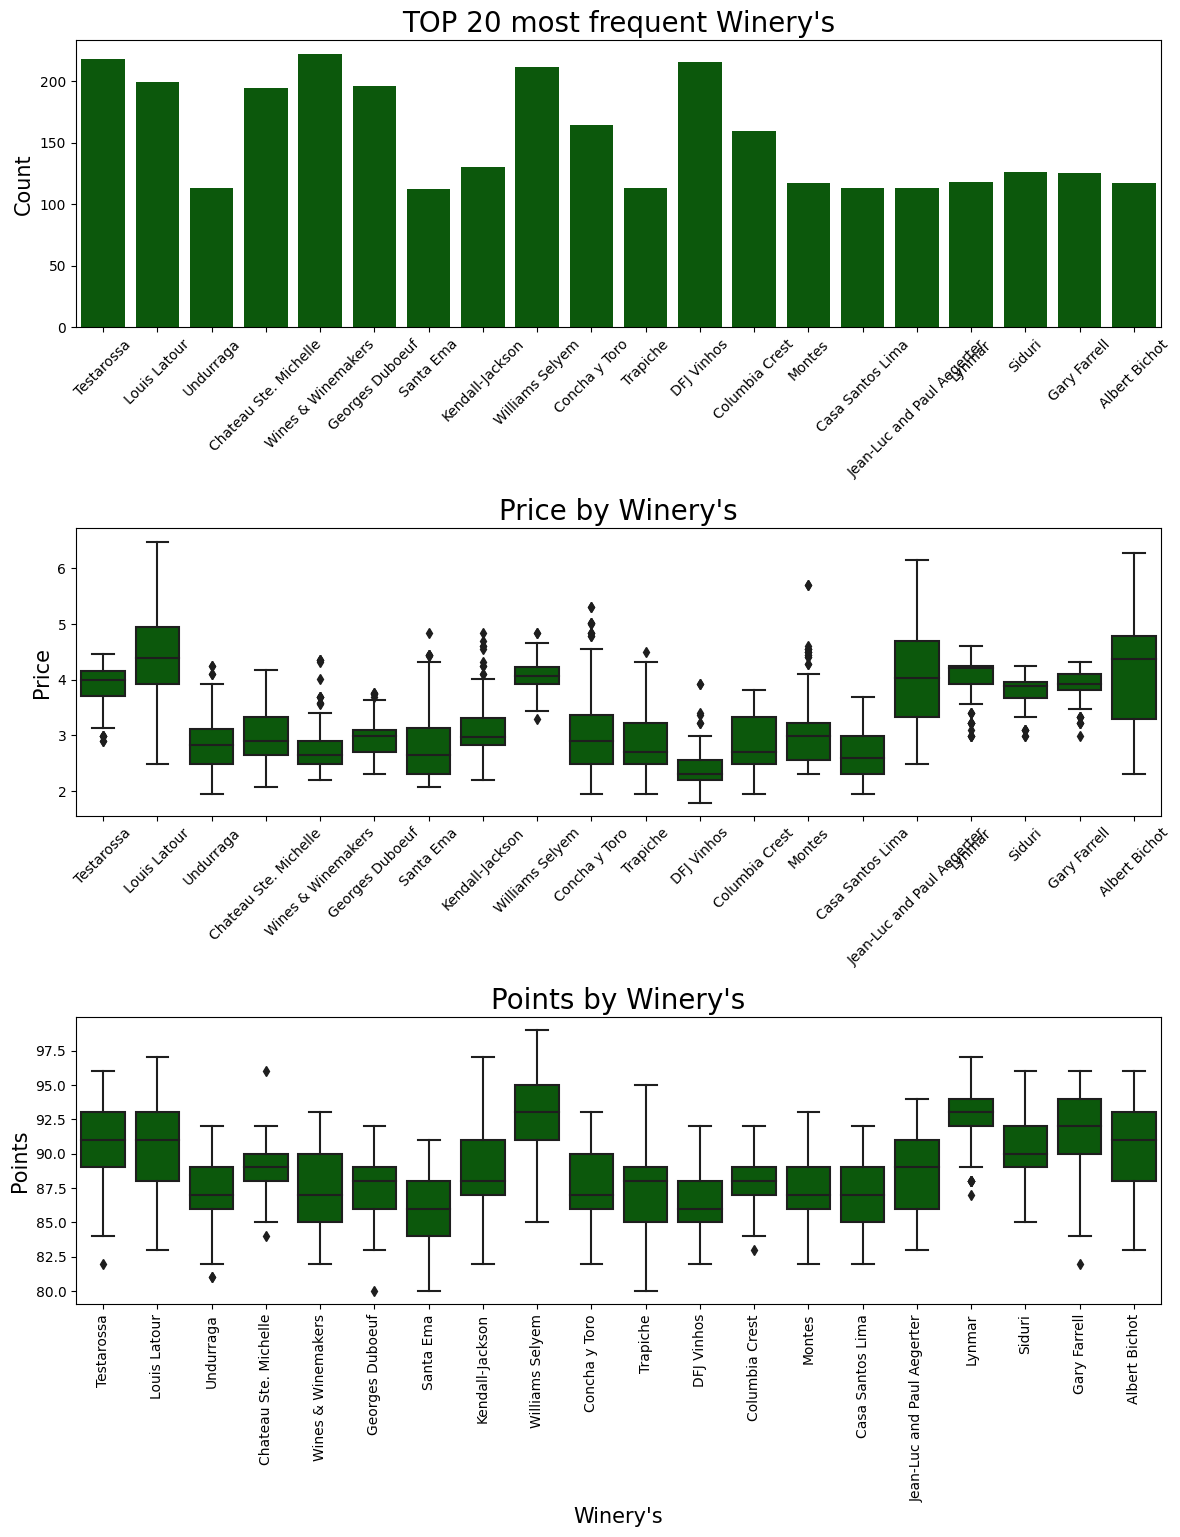

In [ ]:
plt.figure(figsize=(14,16))

winery = df_wine1.winery.value_counts()[:20]

plt.subplot(3,1,1)
g = sns.countplot(x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                  color='darkgreen')
g.set_title("TOP 20 most frequent Winery's", fontsize=20)
g.set_xlabel(" ", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.subplot(3,1,2)
g1 = sns.boxplot(y='price_log', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g1.set_title("Price by Winery's", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Price", fontsize=15)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)

plt.subplot(3,1,3)
g2 = sns.boxplot(y='points', x='winery',
                  data=df_wine1.loc[(df_wine1.winery.isin(winery.index.values))],
                 color='darkgreen')
g2.set_title("Points by Winery's", fontsize=20)
g2.set_xlabel("Winery's", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

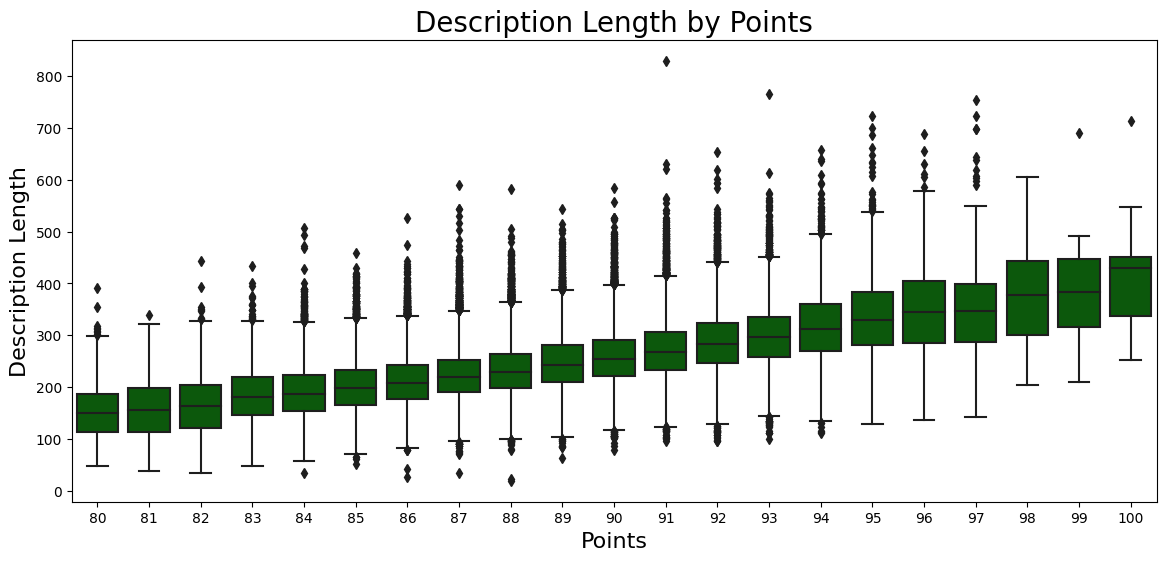

In [ ]:
df_wine1 = df_wine1.assign(desc_length = df_wine1['description'].apply(len))

plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=df_wine1,
                color='darkgreen')
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()

## Who are the sommeliers with biggest descriptions length?!

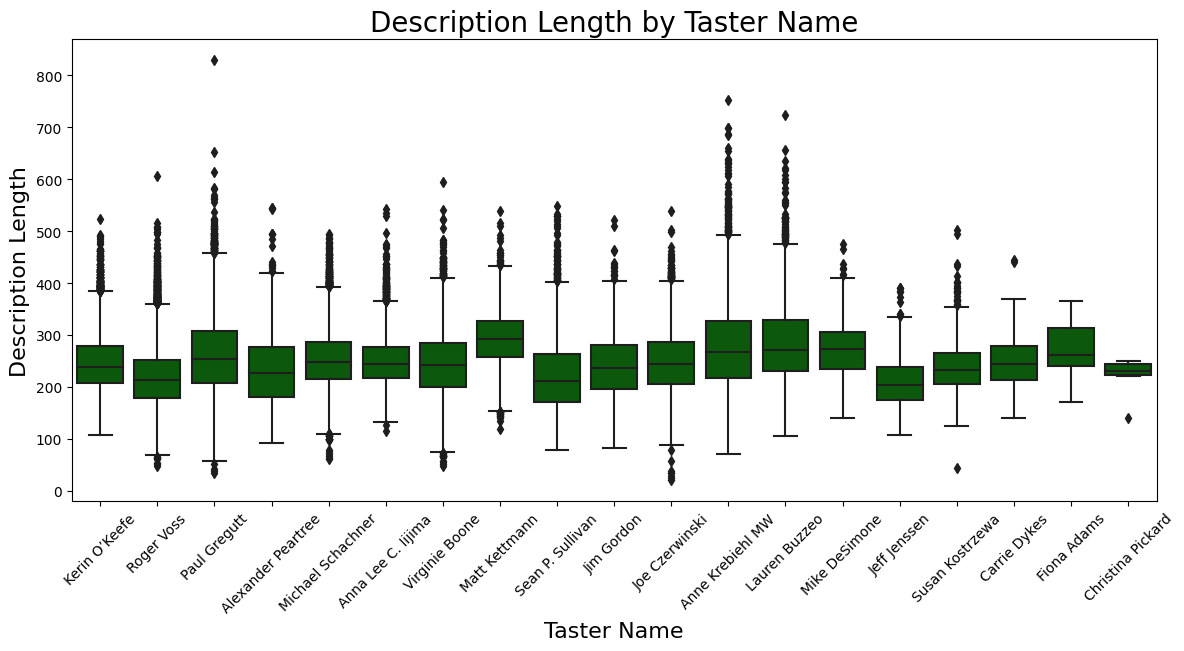

In [ ]:
plt.figure(figsize=(14,6))

g = sns.boxplot(x='taster_name', y='desc_length',
                data=df_wine1, color='darkgreen')
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

Wow, we can see a difference description length per taster name

## Scatter plot of the description length and the price

<ipython-input-67-0025e522efca>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


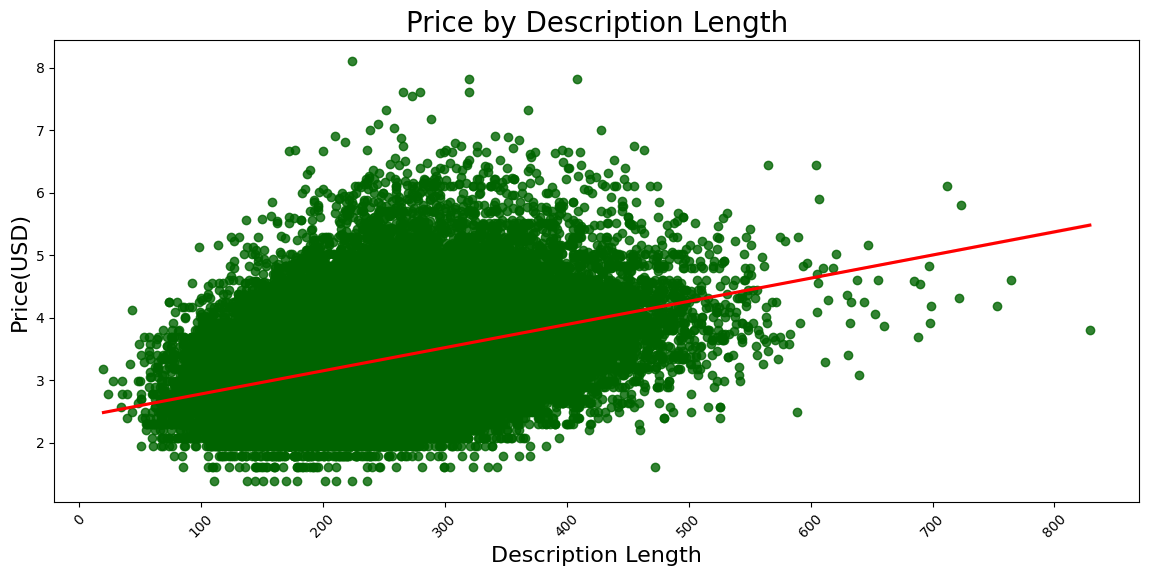

In [ ]:
plt.figure(figsize=(14,6))

g = sns.regplot(x='desc_length', y='price_log', line_kws={'color':'red'},
                data=df_wine1, fit_reg=True, color='darkgreen', )
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16)
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

## WORDCLOUDS OF DESCRIPTIONS

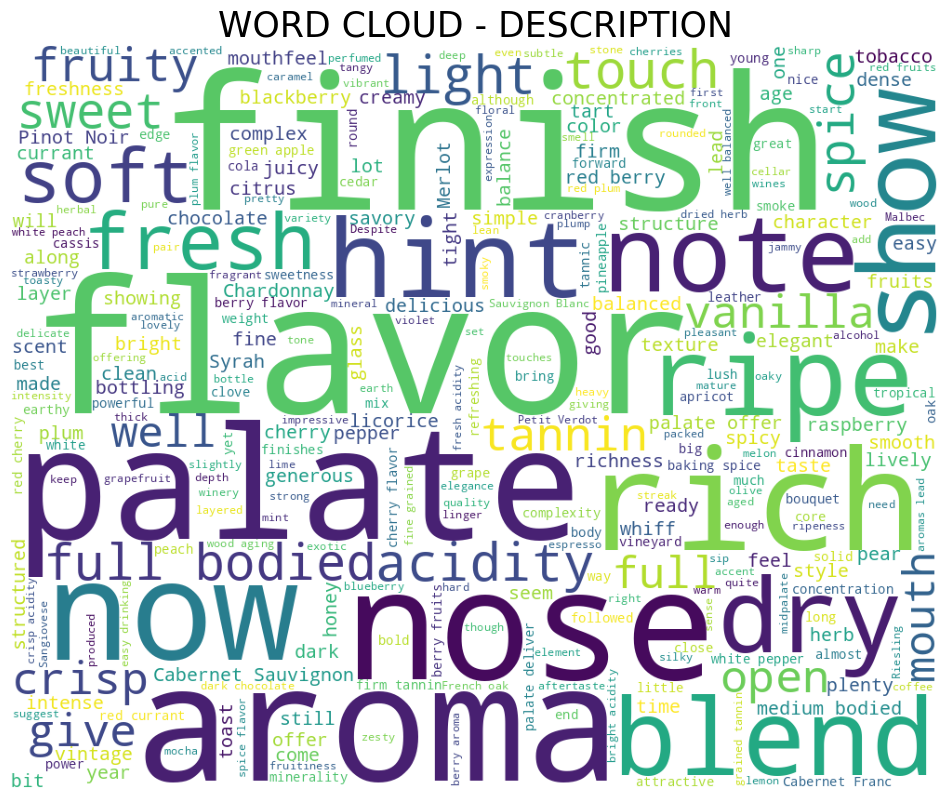

In [ ]:

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200,
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_wine1['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

## WORDCLOUD OF WINE TITLES

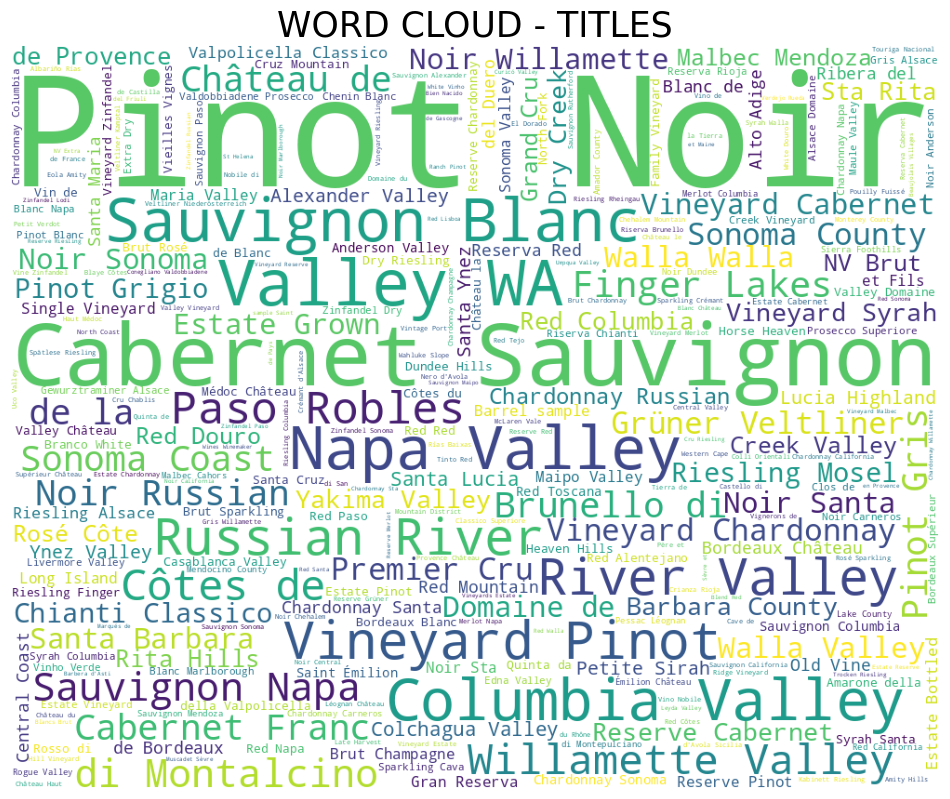

In [ ]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200,
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_wine1['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

# TFIDF Vectorizer in the Wine Review

## Description N-gram

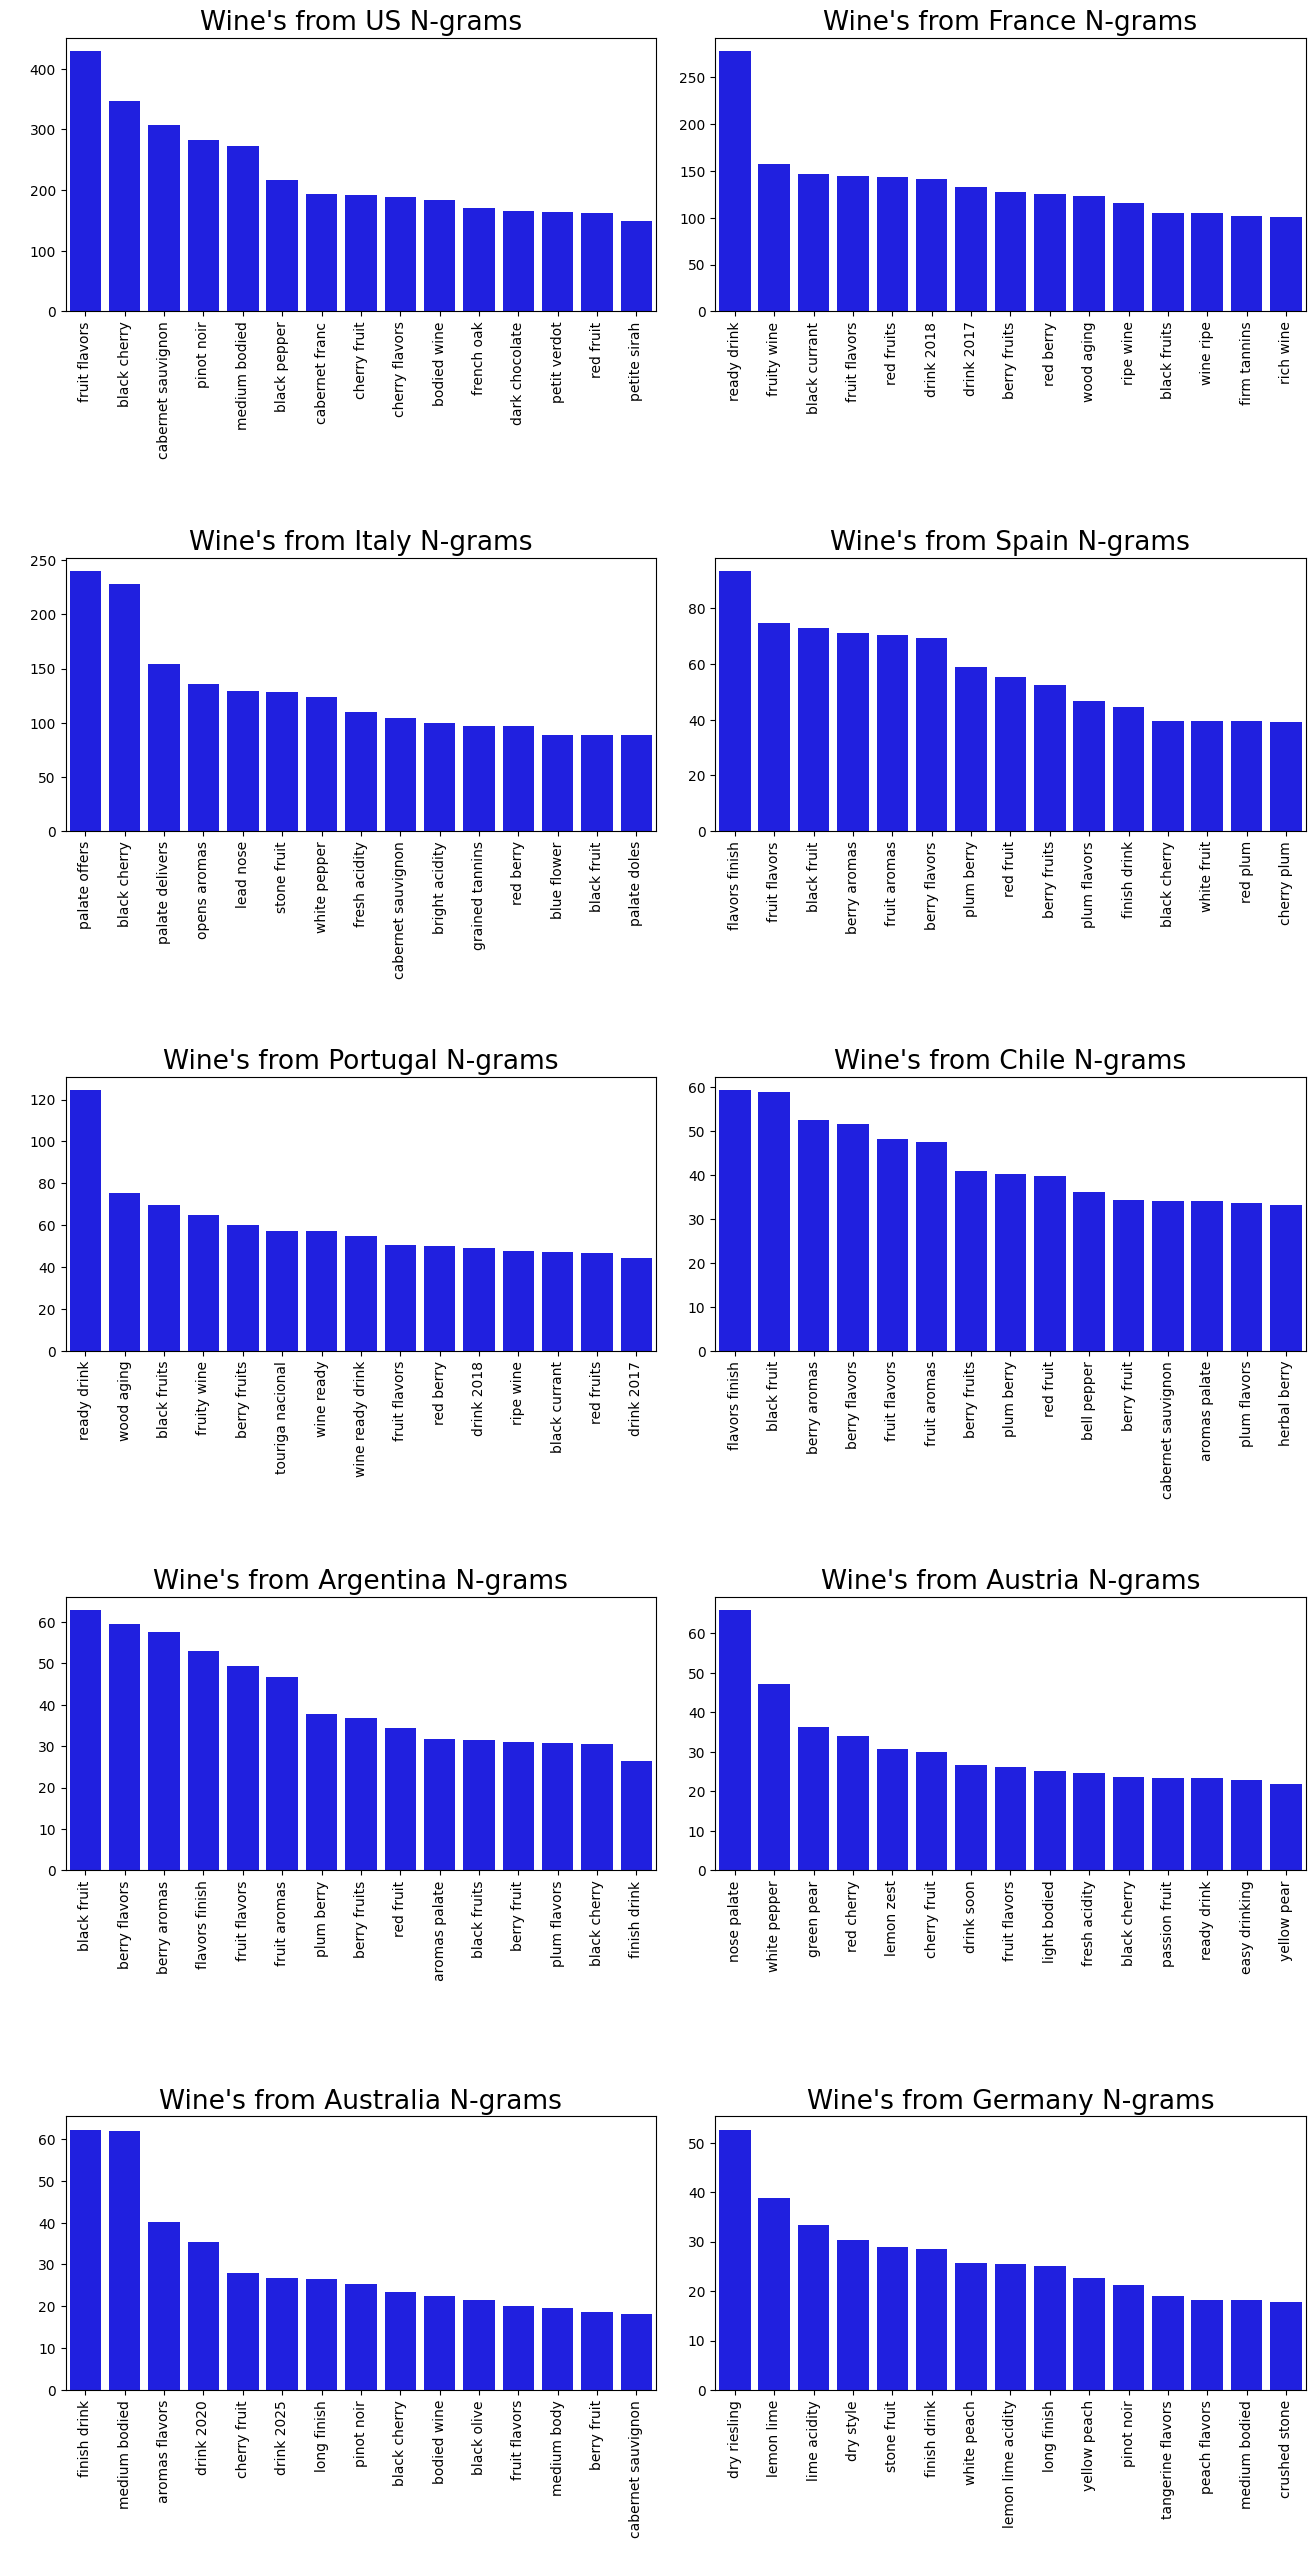

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))

for n, cat in enumerate(country.index[:10]):

    ax = plt.subplot(grid[n])
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5,
                                 stop_words='english',
                                 max_df=.5)

    X2 = vectorizer.fit_transform(df_wine1.loc[(df_wine1.country == cat)]['description'])
    features = (vectorizer.get_feature_names_out())
    scores = (X2.toarray())

    # Getting top ranking features
    sums = X2.sum(axis = 0)
    data1 = []

    for col, term in enumerate(features):
        data1.append( (term, sums[0,col] ))

    ranking = pd.DataFrame(data1, columns = ['term','rank'])
    words = (ranking.sort_values('rank', ascending = False))[:15]

    sns.barplot(x='term', y='rank', data=words, ax=ax,
                color='blue', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

## Sentiment Analysis

In [ ]:
>>> import nltk
>>> nltk.download('vader_lexicon') #Valence Aware Dictionary for Sentiment Reasoning

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
sentiment = df_wine1.sample(15000).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])
sentiment['neutral_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neu'])
sentiment['negative_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['neg'])
sentiment['positive_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['pos'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'


## Ploting the sentiment labels

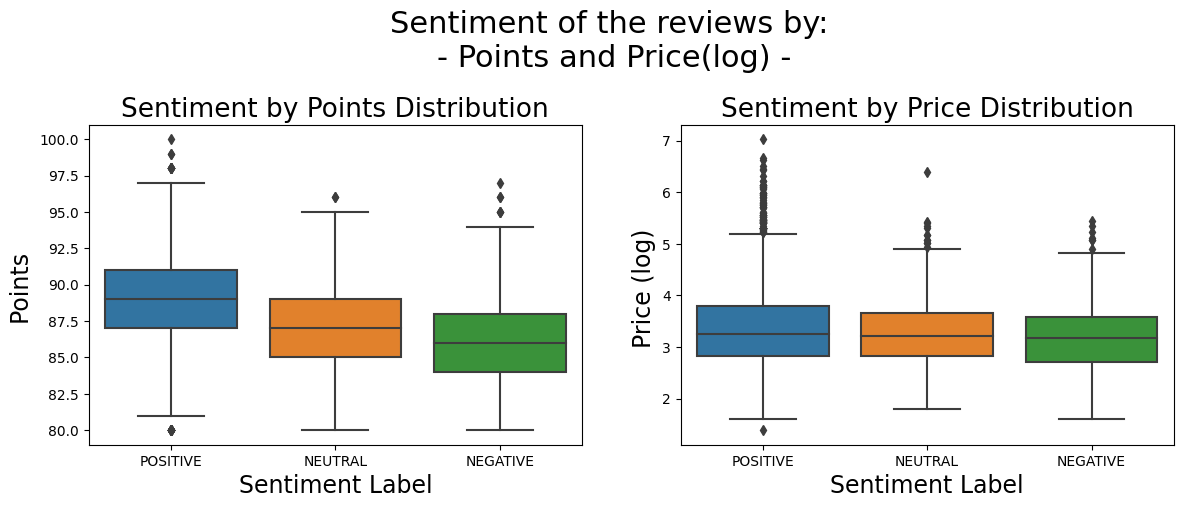

In [ ]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()

## Recommender System using a Collaborative Filtering method

A small recommender system is made using Nearest Neighbors algorithm.

- Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
- Closer the vectors, smaller will be the angle and larger the cosine

### Needed Libraries

In [ ]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix
from sklearn.decomposition import TruncatedSVD # Dimensional Reduction

### Transforming the Columns

In [ ]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']

wine1 = df_wine1[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

## Instantiating the KNN algorithmn and fiting in the Wine Matrix

In [ ]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

## Running our baseline Model

In [ ]:
#index= 'variety',columns='province',values='points'
for n in range(5):
    query_index = np.random.choice(wine_pivot.shape[0])
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')

Recommendation for ## Welschriesling ##:
1: Austrian white blend with distance: 0.39516915957714704
2: Blauburgunder with distance: 0.4051593482171427
3: Rosenmuskateller with distance: 0.43159671051860304
4: Chardonnay Weissburgunder with distance: 0.5703418324256762
5: Sämling with distance: 0.5726195331931879


Recommendation for ## Boğazkere ##:
1: Kalecik Karasi with distance: 0.00014362835091530357
2: Okuzgozu with distance: 0.2515514369401026
3: Narince with distance: 0.28710546487668764
4: Kuntra with distance: 0.5041994308311355
5: Emir with distance: 0.5041994308311355


Recommendation for ## Monastrell ##:
1: Tempranillo-Cabernet Sauvignon with distance: 0.1283537456089653
2: Counoise with distance: 0.16457171535192217
3: Semillon-Chardonnay with distance: 0.16457200595371446
4: Souzao with distance: 0.16461548173778517
5: Viognier-Roussanne with distance: 0.16487136035071626


Recommendation for ## Blanc du Bois ##:
1: Piquepoul Blanc with distance: 0.0
2: Jacquez with dist